In [153]:
#conv Neural Network
# tensorboard --logdir=/home/ncc/notebook/learn/tensorboard/log
"""
created by kim Seong jung

"""
import numpy as np 
import tensorflow as tf
import re

import math
import time
import matplotlib.pyplot as plt
%matplotlib inline
import os 

file_locate='/home/seongjung/바탕화면/Numpy_ASAN/Mal_vs_Benign/100_100/0/0/'
sess = tf.InteractiveSession()
test_img=np.load(file_locate+'test_img.npy');
try:
    print np.shape(test_img)
    img_row = np.shape(test_img)[1]
    img_col = np.shape(test_img)[2]
except:
    np.shape(test_img)
    test_img=np.reshape(test_img , newshape = [np.shape(test_img)[0] , 32, 32 ,3] )
    img_row = np.shape(test_img)[1]
    img_col = np.shape(test_img)[2]

save_flag  = False
divide_flag= False
restore_flag =True
#odel_save_path='/media/seongjung/Seagate Backup Plus Drive/data/ASAN/ASAN_weight_bias/3_0/'
model_save_path='/media/seongjung/Seagate Backup Plus Drive/data/ASAN/ASAN_weight_bias/0_0'
if restore_flag ==True:
#   restore_path='/media/seongjung/Seagate Backup Plus Drive/data/ASAN/ASAN_weight_bias/3_0/'
    restore_path='/media/seongjung/Seagate Backup Plus Drive/data/ASAN/ASAN_weight_bias/0_0'
batch_size=30
print img_row ,img_col
n_classes =2
in_ch =3
out_ch1=200
out_ch2=200
out_ch3=200
out_ch4=200
out_ch5=200


fully_ch1=1024
fully_ch2 =1024
fully_ch3 =1024



strides_1=[1,2,2,1]
strides_2=[1,1,1,1]
strides_3=[1,1,1,1]
strides_4=[1,1,1,1]
strides_5=[1,1,1,1]


x= tf.placeholder("float",shape=[None,img_col , img_row , 3],  name = 'x-input')
y_=tf.placeholder("float",shape=[None , n_classes] , name = 'y-input')
keep_prob = tf.placeholder("float")

x_image= tf.reshape(x,[-1,img_row,img_col,3])

iterate=1



weight_row =3 ; weight_col=3


pooling_row_size1=int(img_row/2)
pooling_row_size2=int(pooling_row_size1/2)
pooling_row_size3=int(pooling_row_size2/2)
pooling_row_size4=int(pooling_row_size3/2)
pooling_row_size5=int(pooling_row_size4/2)
pooling_col_size1=int(img_col/2)
pooling_col_size2=int(pooling_col_size1/2)
pooling_col_size3=int(pooling_col_size2/2)
pooling_col_size4=int(pooling_col_size3/2)
pooling_col_size5=int(pooling_col_size4/2)

print img_col , img_row

(39, 100, 100, 3)
100 100
100 100


# Restore Weight and Bias

In [154]:
import os 
os.getcwd()

'/home/seongjung/jupyter'

In [155]:
with tf.device('/gpu:0'):
#with tf.device('/gpu:0'):

    if divide_flag == False:
        train_img=np.load(file_locate+'train_img.npy');
        train_lab=np.load(file_locate+'train_lab.npy');
        val_img= np.load(file_locate+'val_img.npy');
        val_lab = np.load(file_locate+'val_lab.npy');
        test_img=np.load(file_locate+'test_img.npy');
        test_lab=np.load(file_locate+'test_lab.npy');
        validation_img = np.load('/media/seongjung/Seagate Backup Plus Drive/data/ASAN_Validatation_Set/cancer_non_classification_Numpy/test_set.npy')
        validation_lab = np.zeros( [np.shape(validation_img)[0], 2 ])
        print "Training Data",np.shape(train_img)
        print "Training Data Label",np.shape(train_lab)
        print "Test Data Label",np.shape(test_lab)
        print "val Data Label" , np.shape(val_img)

        n_train= np.shape(train_img)[0]
        n_train_lab = np.shape(train_lab)[0]

    if divide_flag == True:
        train_img=np.load(file_locate+'train_img_1.npy');
        train_lab=np.load(file_locate+'train_lab_1.npy');
        val_img= np.load(file_locate+'val_img.npy');
        val_lab = np.load(file_locate+'val_lab.npy');
        test_img=np.load(file_locate+'test_img.npy');
        test_lab=np.load(file_locate+'test_lab.npy');
        validation_img = np.load('/media/seongjung/Seagate Backup Plus Drive/data/ASAN_Validatation_Set/cancer_non_classification_Numpy/test_set.npy')
        validation_lab = np.zeros( [np.shape(validation_img)[0], 2 ])

        print "Training Data",np.shape(train_img)
        print "Training Data Label",np.shape(train_lab)
        print "Test Data Label",np.shape(test_lab)
        print "val Data Label" , np.shape(val_lab)

        n_train= np.shape(train_img)[0]
        n_train_lab = np.shape(train_lab)[0]


Training Data (306, 100, 100, 3)
Training Data Label (306, 2)
Test Data Label (39, 2)
val Data Label (38, 100, 100, 3)


In [156]:
"""def weight_variable(name,shape):
    #initial = tf.truncated_normal(shape , stddev=0.1)
    initial = tf.get_variable(name,shape=shape , initializer = tf.contrib.layers.xavier_initializer())
    return tf.Variable(initial)"""
with tf.device('/gpu:0'):
    def bias_variable(shape):
        initial = tf.constant(0.1 , shape=shape)
        return tf.Variable(initial)



In [157]:
with tf.device('/gpu:0'):
    def next_batch(batch_size , image , label):

        a=np.random.randint(np.shape(image)[0] -batch_size)
        batch_x = image[a:a+batch_size,:]
        batch_y= label[a:a+batch_size,:]
        return batch_x, batch_y


In [158]:
with tf.device('/gpu:0'):

    def conv2d(x,w,strides_):
        return tf.nn.conv2d(x,w, strides = strides_, padding='SAME')
    def max_pool_2x2(x):
        return tf.nn.max_pool(x , ksize=[1,2,2,1] ,strides = [1,2,2,1] , padding = 'SAME')

In [159]:
if restore_flag==False:
    with tf.variable_scope("layer1") as scope:
        try:
            w_conv1 = tf.get_variable("W1",[weight_row,weight_col,3,out_ch1] , initializer = tf.contrib.layers.xavier_initializer())
        except:
            scope.reuse_variables()
            w_conv1 = tf.get_variable("W1",[weight_row,weight_col,3,out_ch1] , initializer = tf.contrib.layers.xavier_initializer())
    with tf.variable_scope("layer1") as scope:
        try:
            b_conv1 = bias_variable([out_ch1])
        except:
            scope.reuse_variables()
            b_conv1 = bias_variable([out_ch1])
    with tf.variable_scope('layer2') as scope:
        try:
            w_conv2 = tf.get_variable("W2",[weight_row,weight_col,out_ch1,out_ch2] , initializer = tf.contrib.layers.xavier_initializer())
        except:
            scope.reuse_variables()
            w_conv2 = tf.get_variable("W2",[weight_row,weight_col,out_ch1,out_ch2] , initializer = tf.contrib.layers.xavier_initializer())

    with tf.variable_scope('layer2') as scope:
        try:
            b_conv2= bias_variable([out_ch2])
        except:
            scope.reuse_variables()
            b_conv2= bias_variable([out_ch2])

    with tf.variable_scope('layer3') as scope:
        try:
            w_conv3 = tf.get_variable("W3" ,[weight_row,weight_col,out_ch2,out_ch3] , initializer = tf.contrib.layers.xavier_initializer())
        except:
            scope.reuse_variables()
            w_conv3 = tf.get_variable("W3" ,[weight_row,weight_col,out_ch2,out_ch3] , initializer = tf.contrib.layers.xavier_initializer())
    with tf.variable_scope('layer3') as scope:
        try:
            b_conv3 = bias_variable([out_ch3])
        except:
            scope.reuse_variables()
            b_conv3 = bias_variable([out_ch3])

    with tf.variable_scope('layer4') as scope:
        try:
            w_conv4 =tf.get_variable("W4" ,[weight_row,weight_col,out_ch3,out_ch4] , initializer = tf.contrib.layers.xavier_initializer())
        except:
            scope.reuse_variables()
            w_conv3 = tf.get_variable("W4" ,[weight_row,weight_col,out_ch3,out_ch4] , initializer = tf.contrib.layers.xavier_initializer())
    with tf.variable_scope('layer4') as scope:
        try:
            b_conv4 = bias_variable([out_ch4])
        except:
            scope.reuse_variables()
            b_conv3 = bias_variable([out_ch4])

    with tf.variable_scope('layer5') as scope:
        try:
            w_conv5 = tf.get_variable("W5",[weight_row,weight_col,out_ch4,out_ch5] , initializer = tf.contrib.layers.xavier_initializer())
        except:
            scope.reuse_variables()
            w_conv3 = tf.get_variable("W5" ,[weight_row,weight_col,out_ch4,out_ch5] , initializer = tf.contrib.layers.xavier_initializer())
    with tf.variable_scope('layer5') as scope:
        try:
            b_conv5 = bias_variable([out_ch5])
        except:
            scope.reuse_variables()
            b_conv3 = bias_variable([out_ch5])


In [160]:
if restore_flag==True:
    with tf.variable_scope("layer1") as scope:
        try:
            w_conv1 = tf.Variable(np.load(restore_path+'/w_conv1.npy'),name="W1")
        except:
            scope.reuse_variables()
            w_conv1 = tf.Variable(np.load(restore_path+'/w_conv1.npy'),name="W1")
    with tf.variable_scope("layer1") as scope:
        try:
            b_conv1 = tf.Variable(np.load(restore_path+'/b_conv1.npy'),name="B1")
        except:
            scope.reuse_variables()
            b_conv1 =tf.Variable(np.load(restore_path+'/b_conv1.npy'),name="B1")
    with tf.variable_scope("layer2") as scope:
        try:
            w_conv2 = tf.Variable(np.load(restore_path+'/w_conv2.npy'),name="W2")
        except:
            scope.reuse_variables()
            w_conv2 = tf.Variable(np.load(restore_path+'/w_conv2.npy'),name="W2")
    with tf.variable_scope("layer2") as scope:
        try:
            b_conv2 = tf.Variable(np.load(restore_path+'/b_conv2.npy'),name="B2")
        except:
            scope.reuse_variables()
            b_conv2 =tf.Variable(np.load(restore_path+'/b_conv2.npy'),name="B2")
    with tf.variable_scope("layer3") as scope:
        try:
            w_conv3 = tf.Variable(np.load(restore_path+'/w_conv3.npy'),name="W3")
        except:
            scope.reuse_variables()
            w_conv3 = tf.Variable(np.load(restore_path+'/w_conv3.npy'),name="W3")
    with tf.variable_scope("layer3") as scope:
        try:
            b_conv3 = tf.Variable(np.load(restore_path+'/b_conv3.npy'),name="B3")
        except:
            scope.reuse_variables()
            b_conv3 =tf.Variable(np.load(restore_path+'/b_conv3.npy'),name="B3")
    with tf.variable_scope("layer4") as scope:
        try:
            w_conv4 = tf.Variable(np.load(restore_path+'/w_conv4.npy'),name="W4")
        except:
            scope.reuse_variables()
            w_conv4 = tf.Variable(np.load(restore_path+'/w_conv4.npy'),name="W4")
    with tf.variable_scope("layer4") as scope:
        try:
            b_conv4 = tf.Variable(np.load(restore_path+'/b_conv4.npy'),name="B4")
        except:
            scope.reuse_variables()
            b_conv4 =tf.Variable(np.load(restore_path+'/b_conv4.npy'),name="B4")
    with tf.variable_scope("layer5") as scope:
        try:
            w_conv5 = tf.Variable(np.load(restore_path+'/w_conv5.npy'),name="W5")
        except:
            scope.reuse_variables()
            w_conv5 = tf.Variable(np.load(restore_path+'/w_conv5.npy'),name="W5")
    with tf.variable_scope("layer5") as scope:
        try:
            b_conv5 = tf.Variable(np.load(restore_path+'/b_conv5.npy'),name="B5")
        except:
            scope.reuse_variables()
            b_conv5 =tf.Variable(np.load(restore_path+'/b_conv5.npy'),name="B5")

In [161]:
#conncect hidden layer 
with tf.device('/gpu:0'):
    h_conv1 = tf.nn.relu(conv2d(x_image , w_conv1 ,strides_1)+b_conv1)
    h_conv2 = tf.nn.relu(conv2d(h_conv1 , w_conv2 ,strides_2)+b_conv2)
    h_conv2 = max_pool_2x2(h_conv2)#pooling
    
    h_conv3 = tf.nn.relu(conv2d(h_conv2 , w_conv3,strides_3)+b_conv3)
    h_conv4 = tf.nn.relu(conv2d(h_conv3 , w_conv4,strides_4)+b_conv4)
    h_pool4 = max_pool_2x2(h_conv4) #pooling 

    h_conv5 = tf.nn.relu(conv2d(h_conv4, w_conv5,strides_5)+b_conv5)
    h_conv5= max_pool_2x2(h_conv5) #pooling 

    print h_conv1
    print h_conv2
    print h_conv3
    print h_conv4
    print h_conv5
    


Tensor("Relu_16:0", shape=(?, 50, 50, 200), dtype=float32, device=/device:GPU:0)
Tensor("MaxPool_6:0", shape=(?, 25, 25, 200), dtype=float32, device=/device:GPU:0)
Tensor("Relu_18:0", shape=(?, 25, 25, 200), dtype=float32, device=/device:GPU:0)
Tensor("Relu_19:0", shape=(?, 25, 25, 200), dtype=float32, device=/device:GPU:0)
Tensor("MaxPool_8:0", shape=(?, 13, 13, 200), dtype=float32, device=/device:GPU:0)


In [162]:
end_conv = h_conv5
#print conv2d(h_pool1 , w_conv2).get_shape()
end_conv_row=int(h_conv5.get_shape()[1])
end_conv_col=int(h_conv5.get_shape()[2])
end_conv_ch=int(h_conv5.get_shape()[3])
#connect fully connected layer 

In [163]:
#connect fully connected layer 
if restore_flag==False:
    with tf.device('/gpu:0'):
        with tf.variable_scope("fc1") as scope:
            try:
                w_fc1=tf.get_variable("fc1_W",[end_conv_col*end_conv_row*end_conv_ch,fully_ch1] , initializer = tf.contrib.layers.xavier_initializer())
            except:
                scope.reuse_variables()
                w_fc1=tf.get_variable("fc1_W",[end_conv_col*end_conv_row*end_conv_ch,fully_ch1] , initializer = tf.contrib.layers.xavier_initializer())
            try:
                b_fc1 = bias_variable([fully_ch1])
            except:
                scope.reuse_variables()
                b_fc1 = bias_variable([fully_ch1])
elif restore_flag==True:
    with tf.device('/gpu:0'):
        with tf.variable_scope("fc1") as scope:
            try:
                w_fc1=tf.Variable(np.load(restore_path+'/w_fc1.npy'),name="fc1_W")
            except:
                scope.reuse_variables()
                w_fc1=tf.Variable(np.load(restore_path+'/w_fc1.npy'),name="fc1_W")
            try:
                b_fc1=tf.Variable(np.load(restore_path+'/b_fc1.npy'),name="fc1_B")
            except:
                scope.reuse_variables()
                b_fc1=tf.Variable(np.load(restore_path+'/b_fc1.npy'),name="fc1_B")

        
with tf.device('/gpu:0'): # flat conv layer 
    end_flat_conv =tf.reshape(end_conv, [-1,end_conv_col*end_conv_row*end_conv_ch])
   
with tf.device('/gpu:0'): # connect flat layer with fully  connnected layer 
    h_fc1 = tf.nn.relu(tf.matmul(end_flat_conv , w_fc1)+ b_fc1)
    h_fc1 = tf.nn.dropout(h_fc1, keep_prob)

In [164]:
np.shape(np.load('/home/seongjung/variable_save/w_fc1.npy'))

(12800, 1024)

In [165]:

#connect fully connected layer 
if restore_flag==False:
    with tf.device('/gpu:0'):
        with tf.variable_scope("fc2") as scope:
            try:
                w_fc2=tf.get_variable("fc2_W",[fully_ch1,fully_ch2] , initializer = tf.contrib.layers.xavier_initializer())
            except:
                scope.reuse_variables()
                w_fc2=tf.get_variable("fc2_W",[fully_ch1,fully_ch2] , initializer = tf.contrib.layers.xavier_initializer())
            try:
                b_fc2 = bias_variable([fully_ch2])
            except:
                scope.reuse_variables()
                b_fc2 = bias_variable([fully_ch2])
elif restore_flag==True:
    with tf.device('/gpu:0'):
        with tf.variable_scope("fc2") as scope:
            try:
                w_fc2=tf.Variable(np.load(restore_path+'/w_fc2.npy'),name="fc2_W")
            except:
                scope.reuse_variables()
                w_fc2=tf.Variable(np.load(restore_path+'/w_fc2.npy'),name="fc2_W")
            try:
                b_fc2=tf.Variable(np.load(restore_path+'/b_fc2.npy'),name="fc2_B")
            except:
                scope.reuse_variables()
                b_fc2=tf.Variable(np.load(restore_path+'/b_fc2.npy'),name="fc2_B")

with tf.device('/gpu:0'): # connect flat layer with fully  connnected layer 
    h_fc2 = tf.nn.relu(tf.matmul(h_fc1 , w_fc2)+ b_fc2)
    h_fc2 = tf.nn.dropout(h_fc2, keep_prob)

In [166]:
#connect fully connected layer 
if restore_flag==False:
    with tf.device('/gpu:0'):
        with tf.variable_scope("fc3") as scope:
            try:
                w_fc3=tf.get_variable("fc3_W",[fully_ch2,fully_ch3] , initializer = tf.contrib.layers.xavier_initializer())
            except:
                scope.reuse_variables()
                w_fc3=tf.get_variable("fc3_W",[fully_ch2,fully_ch3] , initializer = tf.contrib.layers.xavier_initializer())
            try:
                b_fc3 = bias_variable([fully_ch3])
            except:
                scope.reuse_variables()
                b_fc3 = bias_variable([fully_ch3])
elif restore_flag==True:
    with tf.device('/gpu:0'):
        with tf.variable_scope("fc3") as scope:
            try:
                w_fc3=tf.Variable(np.load(restore_path+'/w_fc3.npy'),name="fc3_W")
            except:
                scope.reuse_variables()
                w_fc3=tf.Variable(np.load(restore_path+'/w_fc3.npy'),name="fc3_W")
            try:
                b_fc3=tf.Variable(np.load(restore_path+'/b_fc3.npy'),name="fc3_B")
            except:
                scope.reuse_variables()
                b_fc3=tf.Variable(np.load(restore_path+'/b_fc3.npy',name="fc3_B"))

with tf.device('/gpu:0'): # connect flat layer with fully  connnected layer 
    h_fc3 = tf.nn.relu(tf.matmul(h_fc2 , w_fc3)+ b_fc3)
    h_fc3 = tf.nn.dropout(h_fc3, keep_prob)

In [167]:
end_fc=h_fc3

In [168]:
if restore_flag==False:
    with tf.device('/gpu:0'):
        with tf.variable_scope('fc3') as scope:
            try:
                w_end =tf.get_variable("end_W",[fully_ch3 , n_classes ],initializer = tf.contrib.layers.xavier_initializer())
            except:
                scope.reuse_variables()
                w_end =tf.get_variable("end_W",[fully_ch3 , n_classes],initializer = tf.contrib.layers.xavier_initializer())
            try:
                b_end = bias_variable([n_classes])
            except:
                scope.reuse_variables()
                b_end = bias_variable([n_classes])
elif restore_flag==True:
    with tf.device('/gpu:0'):
        with tf.variable_scope("fc3") as scope:
            try:
                w_end=tf.Variable(np.load(restore_path+'/w_end.npy'),name="end_W")
            except:
                scope.reuse_variables()
                w_end=tf.Variable(np.load(restore_path+'/w_end.npy'),name="end_W")
            try:
                b_end=tf.Variable(np.load(restore_path+'/b_end.npy'),name="end_B")
            except:
                scope.reuse_variables()
                b_end=tf.Variable(np.load(restore_path+'/b_end.npy'),name="end_B")

with tf.device('/gpu:0'):  # join flat layer with fully  connnected layer 
    y_conv = tf.matmul(end_fc , w_end)+b_end
    

In [169]:
#dirname = '/home/ncc/notebook/mammo/result/'

dirname='/media/seongjung/Seagate Backup Plus Drive/data/ASAN/result/'
dirname='/home/seongjung/바탕화면/result_temp/'    
count=0
while(True):
    if not os.path.isdir(dirname):
        os.mkdir(dirname)
        break
    elif not os.path.isdir(dirname + str(count)):
        dirname=dirname+str(count)
        os.mkdir(dirname)
        break
    else:
        count+=1
print 'it is recorded at :'+str(count)

it is recorded at :27


In [170]:
f=open(dirname+"/log.txt",'w')

In [171]:
def get_batch_list(folder_path):
    list_files=os.walk(folder_path).next()[2]
    print list_files
    ret_train_img_list=[]
    ret_train_lab_list=[]
    for i , ele in enumerate(list_files):

        if 'train'  in ele and 'img'in ele:
            ret_train_img_list.append(ele)
        elif 'train' in ele  and  'lab' in ele:
            ret_train_lab_list.append(ele)
    return ret_train_img_list ,ret_train_lab_list 

In [172]:
train_images , train_labels  = get_batch_list(file_locate)

['val_lab.npy', 'test_lab.npy', 'train_lab.npy', 'val_img.npy', 'test_img.npy', 'train_img.npy']


In [173]:
def atoi(text):
    return int(text) if text.isdigit() else text

def natural_keys(text):
    return [ atoi(c) for c in re.split('(\d+)', text) ]


train_images.sort(key=natural_keys)
train_labels.sort(key = natural_keys)
print(train_images)
print(train_labels)

['train_img.npy']
['train_lab.npy']


In [174]:
def save_numpy_weight( model_save_path ):
    
    np_w_conv1,np_w_conv2,np_w_conv3,np_w_conv4,np_w_conv5=sess.run([w_conv1,w_conv2,w_conv3,w_conv4,w_conv5])
    np_b_conv1,np_b_conv2,np_b_conv3,np_b_conv4,np_b_conv5=sess.run([b_conv1,b_conv2,b_conv3,b_conv4,b_conv5])
    np_w_fc1 , np_w_fc2,np_w_fc3,np_w_end=sess.run([w_fc1 , w_fc2,w_fc3 ,w_end])
    np_b_fc1 , np_b_fc2,np_b_fc3,np_b_end=sess.run([b_fc1 , b_fc2,b_fc3,b_end])
    
    np_w_conv1=np.asarray(np_w_conv1)
    np_w_conv2=np.asarray(np_w_conv2)
    np_w_conv3=np.asarray(np_w_conv3)
    np_w_conv4=np.asarray(np_w_conv4)
    np_w_conv5=np.asarray(np_w_conv5)
    
    np_b_conv1=np.asarray(np_b_conv1)
    np_b_conv2=np.asarray(np_b_conv2)
    np_b_conv3=np.asarray(np_b_conv3)
    np_b_conv4=np.asarray(np_b_conv4)
    np_b_conv5=np.asarray(np_b_conv5)
    
    np_w_fc1=np.asarray(np_w_fc1)
    np_w_fc2=np.asarray(np_w_fc2)
    np_w_fc3=np.asarray(np_w_fc3)
    np_w_end=np.asarray(np_w_end)
    
    np_b_fc1=np.asarray(np_b_fc1)
    np_b_fc2=np.asarray(np_b_fc2)
    np_b_fc3=np.asarray(np_b_fc3)
    np_b_end=np.asarray(np_b_end)
    
    
    np.save(model_save_path +'w_conv1' , np_w_conv1)
    np.save(model_save_path +'w_conv2' , np_w_conv2)
    np.save(model_save_path +'w_conv3' , np_w_conv3)
    np.save(model_save_path +'w_conv4' , np_w_conv4)
    np.save(model_save_path +'w_conv5' , np_w_conv5)
    
    np.save(model_save_path +'b_conv1' , np_b_conv1)
    np.save(model_save_path +'b_conv2' , np_b_conv2)
    np.save(model_save_path +'b_conv3' , np_b_conv3)
    np.save(model_save_path +'b_conv4' , np_b_conv4)
    np.save(model_save_path +'b_conv5' , np_b_conv5)

    np.save(model_save_path +'w_fc1' , np_w_fc1)
    np.save(model_save_path +'w_fc2' , np_w_fc2)
    np.save(model_save_path +'w_fc3' , np_w_fc3)
    np.save(model_save_path +'w_end' , np_w_end)
    
    np.save(model_save_path +'b_fc1' , np_b_fc1)
    np.save(model_save_path +'b_fc2' , np_b_fc2)
    np.save(model_save_path +'b_fc3' , np_b_fc3)
    np.save(model_save_path +'b_end' , np_b_end)
    
    

In [175]:
with tf.device('/gpu:0'):
#sm_conv= tf.nn.softmax(y_conv)
    #cross_entropy = -tf.reduce_sum(y_*tf.log(y_conv))
    start_time = time.time()

    regular=0.01*(tf.reduce_sum(tf.square(y_conv)))
    pred=tf.nn.softmax(y_conv)
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits( y_conv, y_))
with tf.device('/gpu:0'):
    cost = cost+regular
    train_step = tf.train.AdamOptimizer(1e-4).minimize(cost) #1e-4
    with tf.name_scope("accuracy"):
        with tf.name_scope('correct_prediction'):
            correct_prediction = tf.equal(tf.argmax(y_conv,1) ,tf.argmax(y_,1))
        with tf.name_scope('accuracy'):
            accuracy = tf.reduce_mean(tf.cast(correct_prediction , "float")) 

    sess = tf.Session()
    sess.run(tf.initialize_all_variables())

batch_count=0
max_acc=0
if divide_flag ==True:
    n_batch =len(train_images)
    batch_count=0
show_Exception_flag=True
val_acc_list=[]
val_loss_list=[]
train_acc_list=[]
train_loss_list=[]
for i in range(iterate):    
    if divide_flag ==True:
        if batch_count >= n_batch:
            batch_count =0
        train_img =np.load(file_locate+train_images[batch_count])
        train_lab =np.load(file_locate+train_labels[batch_count])
    batch_xs , batch_ys = next_batch(batch_size, train_img , train_lab)
   # batch_val_xs  , batch_val_ys = next_batch(20 , val_img , val_lab)

    if i%100 ==0: # in here add to validation 
        try:
            val_accuracy = sess.run( accuracy , feed_dict={x:val_img , y_:val_lab , keep_prob: 1.0})        
            val_loss = sess.run(cost , feed_dict = {x:val_img , y_: val_lab , keep_prob: 1.0})
            train_accuracy = sess.run( accuracy , feed_dict={x:batch_xs , y_:batch_ys , keep_prob: 1.0})        
            train_loss = sess.run(cost , feed_dict = {x:batch_xs, y_: batch_ys, keep_prob: 1.0})
            test_accuracy,test_loss= sess.run([accuracy,cost]  , feed_dict={x:test_img , y_:test_lab , keep_prob: 1.0})
            
            val_acc_list.append(val_accuracy)
            val_loss_list.append(val_loss)
            train_acc_list.append(train_accuracy)
            train_loss_list.append(train_loss)
            
            if (val_accuracy+test_accuracy)/2 > max_acc:
                print 'model was saved'
                if save_flag == True:
                    save_numpy_weight(model_save_path)
                max_acc=(val_accuracy+test_accuracy)/2
            #result = sess.run(sm_conv , feed_dict = {x:val_img , y_:batch_ys , keep_prob :1.0})
            print("step %d , training  accuracy %g" %(i,train_accuracy))
            print("step %d , loss : %g" %(i,train_loss))
            train_str = 'step:\t'+str(i)+'\tval_loss:\t'+str(train_loss) +'\tval accuracy:\t'+str(train_accuracy)+'\n'
            print("step %d , validation  accuracy %g" %(i,val_accuracy))
            print("step %d , validation loss : %g" %(i,val_loss))
            val_str = 'step:\t'+str(i)+'\tval_loss:\t'+str(val_loss) +'\tval accuracy:\t'+str(val_accuracy)+'\n'
            print("step %d , test  accuracy %g" %(i,test_accuracy))
            print("step %d , test loss : %g" %(i,test_loss))
            
            f.write(val_str)
            f.write(train_str)
            if divide_flag ==True:
                batch_count+=1
        except Exception as e:
            if show_Exception_flag:
                print str(e)
                show_Exception_flag=False
            
            list_acc=[]
            list_loss=[]
            n_divide=len(val_img)/batch_size
            j=0
            for j in range(n_divide):
                # j*batch_size :(j+1)*batch_size
                val_accuracy,val_loss = sess.run([accuracy ,cost], feed_dict={x:val_img[ j*batch_size :(j+1)*batch_size] , y_:val_lab[ j*batch_size :(j+1)*batch_size ] , keep_prob: 1.0})        
                list_acc.append(float(val_accuracy))
                list_loss.append(float(val_loss))
            val_accuracy,val_loss = sess.run([accuracy ,cost], feed_dict={x:val_img[ j*batch_size :] , y_:val_lab[ j*batch_size :  ] , keep_prob: 1.0})         
            list_acc=np.asarray(list_acc)
            list_loss= np.asarray(list_loss)
            val_accuracy=np.mean(list_acc)
            val_loss = np.mean(list_loss)
            
            val_acc_list.append(val_accuracy)
            val_loss_list.append(val_loss)

                        
            list_acc=[]
            list_loss=[]                
            for j in range(n_divide):    
                # j*batch_size :(j+1)*batch_size
                test_accuracy,test_loss = sess.run([accuracy ,cost], feed_dict={x:test_img[ j*batch_size :(j+1)*batch_size] , y_:test_lab[ j*batch_size :(j+1)*batch_size ] , keep_prob: 1.0})        
                list_acc.append(float(test_accuracy))
                list_loss.append(float(test_loss))
            #right above code have to modify
            test_accuracy,test_loss = sess.run([accuracy ,cost], feed_dict={x:val_img[ j*batch_size :] , y_:val_lab[ j*batch_size :  ] , keep_prob: 1.0})         
            list_acc.append(test_accuracy)
            list_loss.append(test_loss)
            

            #result = sess.run(sm_conv , feed_dict = {x:val_img , y_:batch_ys , keep_prob :1.0})
            
            train_accuracy = sess.run( accuracy , feed_dict={x:batch_xs , y_:batch_ys , keep_prob: 1.0})        
            train_loss = sess.run(cost , feed_dict = {x:batch_xs, y_: batch_ys, keep_prob: 1.0})
            train_acc_list.append(train_accuracy)
            train_loss_list.append(train_loss)
            
            print("step %d , training  accuracy %g" %(i,train_accuracy))
            print("step %d , loss : %g" %(i,train_loss))
            train_str = 'step:\t'+str(i)+'\tval_loss:\t'+str(train_loss) +'\tval accuracy:\t'+str(train_accuracy)+'\n'
            
            print("step %d , validation  accuracy %g" %(i,val_accuracy))
            print("step %d , validation loss : %g" %(i,val_loss))
            val_str = 'step:\t'+str(i)+'\tval_loss:\t'+str(val_loss) +'\tval accuracy:\t'+str(val_accuracy)+'\n'
            print("step %d , test  accuracy %g" %(i,test_accuracy))
            print("step %d , test loss : %g" %(i,test_loss))           
            
            f.write(val_str)
            f.write(train_str)
            batch_count+=1
            
            val_acc_list.append(val_accuracy)
            val_loss_list.append(val_loss)
            train_acc_list.append(train_accuracy)
            train_loss_list.append(train_loss)    

        sess.run(train_step ,feed_dict={x:batch_xs , y_:batch_ys , keep_prob : 0.7})

np.save(model_save_path+'val_acc',np.asarray(val_acc_list))
np.save(model_save_path+'val_loss',np.asarray(val_loss_list))
np.save(model_save_path+'train_acc',np.asarray(train_acc_list))
np.save(model_save_path+'train_loss',np.asarray(train_loss_list))

softmax_val=sess.run( pred , feed_dict={x:val_img  ,y_:val_lab, keep_prob: 1.0})
softmax_test=sess.run( pred , feed_dict={x:test_img  ,y_:test_lab, keep_prob: 1.0})
softmax_validation=sess.run( pred , feed_dict={x:validation_img  ,y_:validation_lab, keep_prob: 1.0})
test_accuracy,test_loss= sess.run([accuracy,cost]  , feed_dict={x:test_img , y_:test_lab , keep_prob: 1.0})
print("--- Training Time : %s ---" % (time.time() - start_time))
train_time="--- Training Time : ---:\t" +str(time.time() - start_time)
f.write(train_time)

Instructions for updating:
Use `tf.global_variables_initializer` instead.
model was saved
step 0 , training  accuracy 1
step 0 , loss : 0.462306
step 0 , validation  accuracy 0.973684
step 0 , validation loss : 0.527849
step 0 , test  accuracy 0.692308
step 0 , test loss : 0.743099
--- Training Time : 56.8585119247 ---


### Test Set 

In [176]:
softmax_pred_np=np.asarray(softmax_test)
softmax_pred_cls_np=np.zeros( [len(softmax_pred_np) , 2])
for i in range(len(softmax_pred_np)):
    if softmax_pred_np[i , 0] >softmax_pred_np[i , 1]:
        softmax_pred_cls_np[i , 0:1] =1
    elif softmax_pred_np[i , 0] <softmax_pred_np[i , 1]:
        
        softmax_pred_cls_np[i , 1:2] =1

In [177]:
accuracy_np = np.equal(softmax_pred_cls_np , test_lab)
count=0
print len(accuracy_np)
for i in range(len(accuracy_np)):
    if accuracy_np[i,0]==True:
        count+=1
print count
print float(count)/float(len(test_lab))
                             


39
28
0.717948717949


In [178]:
roc_pred=softmax_pred_np[:,0]
roc_true=test_lab[:,0]          


0.278436 0.72178


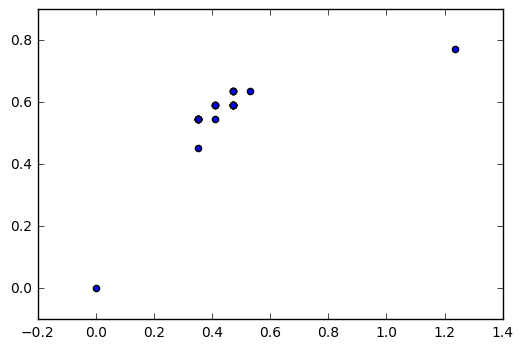

In [179]:
import matplotlib.pyplot as plt
import numpy as np

score = roc_pred
y = roc_true

roc_x = []
roc_y = []
min_score = min(score)
max_score = max(score)
print min_score , max_score
thr = np.linspace(min_score, max_score, 30)
FP=0
TP=0
N = sum(y)
P = len(y) - N

for (i, T) in enumerate(thr):
    for i in range(0, len(score)):
        if (score[i] > T):
            if (y[i]==1):
                TP = TP + 1
            if (y[i]==0):
                FP = FP + 1
    roc_x.append(FP/float(N))
    roc_y.append(TP/float(P))
    FP=0
    TP=0
plt.scatter(roc_x, roc_y)
plt.show()




In [180]:
test_img=np.load('/home/seongjung/save_numpy/1.npy')
print np.shape(test_img)


(81, 64, 64, 3)


In [181]:
softmax_pred_cls_np[:,0]

array([ 1.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,
        1.,  1.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  1.,  0.,  0.,  1.,
        0.,  0.,  0.,  1.,  0.,  1.,  1.,  1.,  1.,  0.,  1.,  0.,  1.])

In [182]:
from sklearn.metrics import confusion_matrix
roc_pred_list =list(softmax_pred_cls_np[:,0])
roc_true_list =list(roc_true)
cm=confusion_matrix(roc_true_list, roc_pred_list)
print cm

[[15  7]
 [ 4 13]]


# Validation Set

In [183]:
softmax_pred_np=np.asarray(softmax_val)
softmax_pred_cls_np=np.zeros( [len(softmax_pred_np) , 2])
for i in range(len(softmax_pred_np)):
    if softmax_pred_np[i , 0] >softmax_pred_np[i , 1]:
        softmax_pred_cls_np[i , 0:1] =1
    elif softmax_pred_np[i , 0] <softmax_pred_np[i , 1]:
        
        softmax_pred_cls_np[i , 1:2] =1

In [184]:
accuracy_np = np.equal(softmax_pred_cls_np , val_lab)
count=0
print len(accuracy_np)
for i in range(len(accuracy_np)):
    if accuracy_np[i,0]==True:
        count+=1
print count
print float(count)/float(len(test_lab))
                             


38
36
0.923076923077


In [185]:
roc_pred=softmax_pred_np[:,0]
roc_true=val_lab[:,0]          


0.279934 0.718563


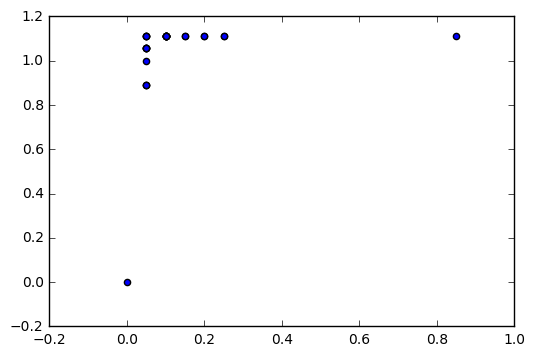

In [186]:
import matplotlib.pyplot as plt
import numpy as np

score = roc_pred
y = roc_true

roc_x = []
roc_y = []
min_score = min(score)
max_score = max(score)
print min_score , max_score
thr = np.linspace(min_score, max_score, 30)
FP=0
TP=0
N = sum(y)
P = len(y) - N

for (i, T) in enumerate(thr):
    for i in range(0, len(score)):
        if (score[i] > T):
            if (y[i]==1):
                TP = TP + 1
            if (y[i]==0):
                FP = FP + 1
    roc_x.append(FP/float(N))
    roc_y.append(TP/float(P))
    FP=0
    TP=0
plt.scatter(roc_x, roc_y)
plt.show()




In [187]:
softmax_pred_cls_np[:,0]

array([ 0.,  1.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  1.,
        0.,  1.,  1.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,  1.,  1.,  0.,
        1.,  0.,  0.,  1.,  1.,  1.,  0.,  1.,  0.,  1.,  1.,  1.])

In [188]:
from sklearn.metrics import confusion_matrix

roc_pred_list =list(softmax_pred_cls_np[:,0])
roc_true_list =list(roc_true)
cm=confusion_matrix(roc_true_list, roc_pred_list)
print cm

[[16  2]
 [ 0 20]]


# Final set

In [189]:
def get_confusion_mat(true_ , pred_cls):
    roc_pred_list =list(pred_cls[:,0])
    roc_true_list =list(true_[:,0] )
    cm=confusion_matrix(roc_true_list, roc_pred_list)
    print cm

In [190]:
def get_pred_cls(softmax_,thred):
    softmax_pred_np=np.asarray(softmax_)
    softmax_pred_cls_np=np.zeros( [len(softmax_pred_np) , 2])
    for i in range(len(softmax_pred_np)):
        
        if softmax_pred_np[i , 0] >thred:
            softmax_pred_cls_np[i , 0:1] =1
            softmax_pred_cls_np[i , 1:2] =0
        elif softmax_pred_np[i , 0] <thred:
            softmax_pred_cls_np[i , 0:1] =0
            softmax_pred_cls_np[i , 1:2] =1
    return softmax_pred_cls_np

In [191]:
pred_cls=get_pred_cls(softmax_validation , thred=0.5)


In [192]:
patient_val=np.zeros([62,2])
patient_val[0,:]=np.mean(softmax_validation[0:4] , axis =0)

In [193]:
patient_val[1,:]=np.mean(softmax_validation[4:18] , axis =0)
patient_val[2,:]=np.mean(softmax_validation[18:21] , axis =0)
patient_val[3,:]=np.mean(softmax_validation[21:27] , axis =0)
patient_val[4,:]=np.mean(softmax_validation[27:29] , axis =0) #5
patient_val[5,:]=np.mean(softmax_validation[29:32] , axis =0)#6
patient_val[6,:]=np.mean(softmax_validation[32:35] , axis =0)#7
patient_val[7,:]=np.mean(softmax_validation[35:38] , axis =0)#8
patient_val[8,:]=np.mean(softmax_validation[38:49] , axis =0)
patient_val[9,:]=np.mean(softmax_validation[49:52] , axis =0) #10
patient_val[10,:]=np.mean(softmax_validation[52:53] , axis =0)#11
patient_val[11,:]=np.mean(softmax_validation[53:65] , axis =0)
patient_val[12,:]=np.mean(softmax_validation[65:74] , axis =0)
patient_val[13,:]=np.mean(softmax_validation[74:77] , axis =0)
patient_val[14,:]=np.mean(softmax_validation[74:83] , axis =0)#15
patient_val[15,:]=np.mean(softmax_validation[83:85] , axis =0)
patient_val[16,:]=np.mean(softmax_validation[85:87] , axis =0)
patient_val[17,:]=np.mean(softmax_validation[87:89] , axis =0)
patient_val[18,:]=np.mean(softmax_validation[89:92] , axis =0)
patient_val[19,:]=np.mean(softmax_validation[92:95] , axis =0)#20
patient_val[20,:]=np.mean(softmax_validation[95:97] , axis =0)#21
patient_val[21,:]=np.mean(softmax_validation[97:103] , axis =0)
patient_val[22,:]=np.mean(softmax_validation[103:109] , axis =0)
patient_val[23,:]=np.mean(softmax_validation[109:110] , axis =0)
patient_val[24,:]=np.mean(softmax_validation[110:113] , axis =0)
patient_val[25,:]=np.mean(softmax_validation[113:130] , axis =0)
patient_val[26,:]=np.mean(softmax_validation[130:135] , axis =0)
patient_val[27,:]=np.mean(softmax_validation[135:138] , axis =0)
patient_val[28,:]=np.mean(softmax_validation[138:140] , axis =0)
patient_val[29,:]=np.mean(softmax_validation[140:148] , axis =0)
patient_val[30,:]=np.mean(softmax_validation[148:154] , axis =0)
patient_val[31,:]=np.mean(softmax_validation[154:158] , axis =0)
patient_val[32,:]=np.mean(softmax_validation[158:170] , axis =0)
patient_val[33,:]=np.mean(softmax_validation[170:196] , axis =0)
patient_val[34,:]=np.mean(softmax_validation[196:203] , axis =0)
patient_val[35,:]=np.mean(softmax_validation[203:208] , axis =0)
patient_val[36,:]=np.mean(softmax_validation[208:215] , axis =0)
patient_val[37,:]=np.mean(softmax_validation[215:217] , axis =0)
patient_val[38,:]=np.mean(softmax_validation[217:219] , axis =0)
patient_val[39,:]=np.mean(softmax_validation[219:224] , axis =0)
patient_val[40,:]=np.mean(softmax_validation[224:252] , axis =0)
patient_val[41,:]=np.mean(softmax_validation[252:256] , axis =0)
patient_val[42,:]=np.mean(softmax_validation[256:259] , axis =0)
patient_val[43,:]=np.mean(softmax_validation[259:271] , axis =0)
patient_val[44,:]=np.mean(softmax_validation[271:274] , axis =0)
patient_val[45,:]=np.mean(softmax_validation[274:276] , axis =0)
patient_val[46,:]=np.mean(softmax_validation[276:282] , axis =0)
patient_val[47,:]=np.mean(softmax_validation[282:284] , axis =0)
patient_val[48,:]=np.mean(softmax_validation[284:289] , axis =0)
patient_val[49,:]=np.mean(softmax_validation[289:292] , axis =0)
patient_val[50,:]=np.mean(softmax_validation[292:297] , axis =0)
patient_val[51,:]=np.mean(softmax_validation[297:307] , axis =0)
patient_val[52,:]=np.mean(softmax_validation[307:309] , axis =0)
patient_val[53,:]=np.mean(softmax_validation[309:313] , axis =0)
patient_val[54,:]=np.mean(softmax_validation[313:319] , axis =0)
patient_val[55,:]=np.mean(softmax_validation[319:321] , axis =0)
patient_val[56,:]=np.mean(softmax_validation[321:325] , axis =0)
patient_val[57,:]=np.mean(softmax_validation[321:334] , axis =0)
patient_val[58,:]=np.mean(softmax_validation[334:336] , axis =0)
patient_val[59,:]=np.mean(softmax_validation[336:342] , axis =0)
patient_val[60,:]=np.mean(softmax_validation[342:347] , axis =0)
patient_val[61,:]=np.mean(softmax_validation[347:352] , axis =0)

In [194]:
print patient_val
print len(patient_val)

[[ 0.53794956  0.46205044]
 [ 0.71349442  0.28650555]
 [ 0.39050546  0.60949451]
 [ 0.64365083  0.35634914]
 [ 0.47939426  0.52060574]
 [ 0.28096727  0.7190327 ]
 [ 0.53442639  0.46557364]
 [ 0.71784371  0.28215626]
 [ 0.67916566  0.32083431]
 [ 0.7169978   0.28300226]
 [ 0.71916556  0.28083447]
 [ 0.65966207  0.34033787]
 [ 0.70684057  0.29315946]
 [ 0.34316158  0.65683848]
 [ 0.49552473  0.5044753 ]
 [ 0.67928374  0.32071632]
 [ 0.71577513  0.2842249 ]
 [ 0.49892351  0.50107652]
 [ 0.53994578  0.46005425]
 [ 0.58959234  0.41040766]
 [ 0.71747208  0.28252786]
 [ 0.58612889  0.41387105]
 [ 0.49683914  0.50316089]
 [ 0.71785223  0.28214774]
 [ 0.64273053  0.35726944]
 [ 0.56768888  0.43231115]
 [ 0.28236121  0.71763873]
 [ 0.57154614  0.42845383]
 [ 0.49888986  0.50111014]
 [ 0.53840595  0.46159399]
 [ 0.50278765  0.49721238]
 [ 0.71658301  0.28341702]
 [ 0.71694607  0.28305396]
 [ 0.64004731  0.35995272]
 [ 0.66496009  0.33503991]
 [ 0.71682084  0.28317922]
 [ 0.6369316   0.36306834]
 

In [196]:
pred_cls=get_pred_cls(patient_val , thred=0.5)
print pred_cls

[[ 1.  0.]
 [ 1.  0.]
 [ 0.  1.]
 [ 1.  0.]
 [ 0.  1.]
 [ 0.  1.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 0.  1.]
 [ 0.  1.]
 [ 1.  0.]
 [ 1.  0.]
 [ 0.  1.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 0.  1.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 0.  1.]
 [ 1.  0.]
 [ 0.  1.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 0.  1.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 0.  1.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 0.  1.]
 [ 1.  0.]
 [ 0.  1.]]
